In [2]:
# Imports

import numpy as np
import imageio
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib as mpl

In [72]:
# Read Images
img_p1_b = imageio.imread("images/p1_b.jpg")
img_p1_m = imageio.imread("images/p1_m.jpg")
img_p2_b = imageio.imread("images/p2_b.jpg")
img_p2_m = imageio.imread("images/p2_m.jpg")
img_p3_b = imageio.imread("images/p3_b.jpg")
img_p3_m = imageio.imread("images/p3_m.jpg")

In [4]:
# Resize Image
img_p1_b = resize(img_p1_b, (1500,1500))
img_p1_m = resize(img_p1_m, (1500,1500))
img_p2_b = resize(img_p2_b, (1500,1500))
img_p2_m = resize(img_p2_m, (1500,1500))
img_p3_b = resize(img_p3_b, (1500,1500))
img_p3_m = resize(img_p3_m, (1500,1500))

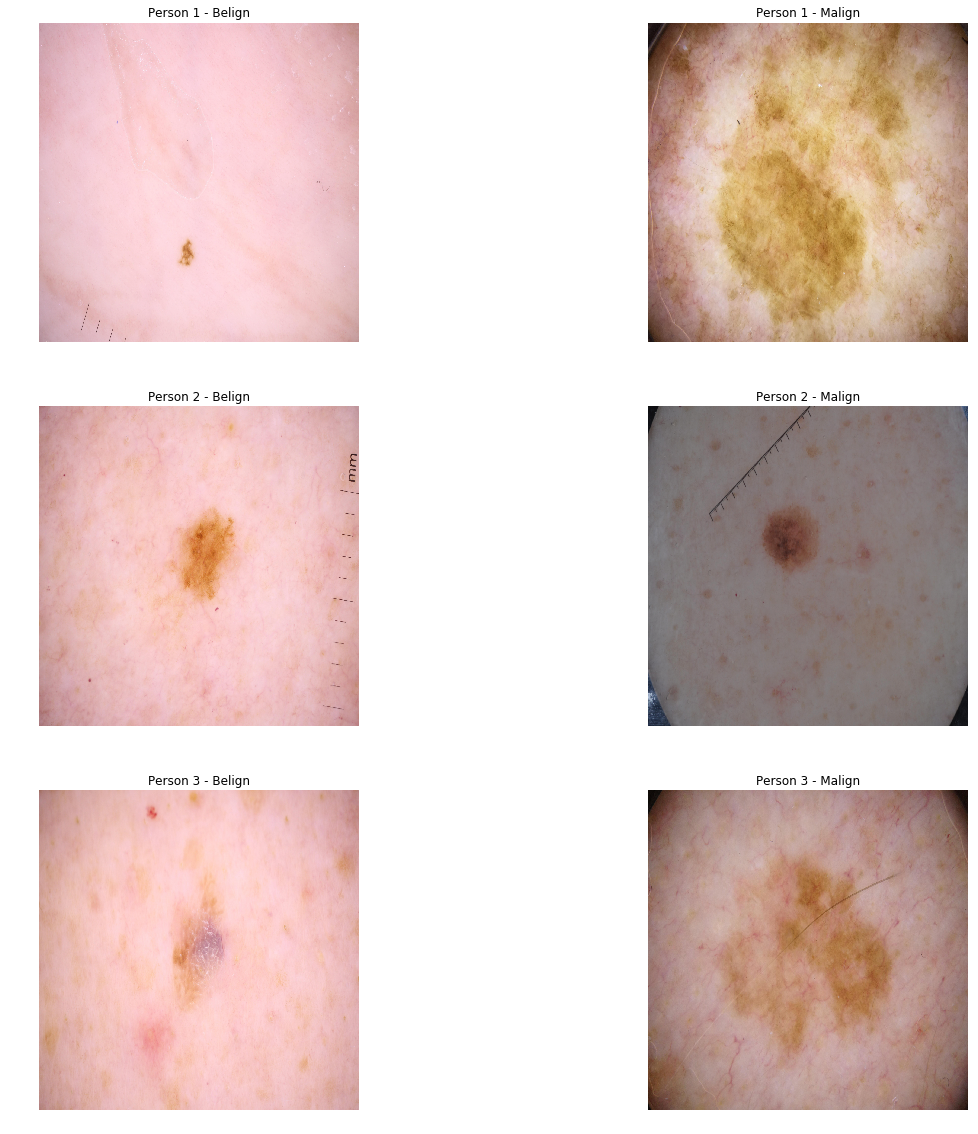

In [5]:
# Show Images
plt.figure(figsize=(20,20))
plt.subplot(321); plt.imshow(img_p1_b); plt.title('Person 1 - Belign'); plt.axis('off')
plt.subplot(322); plt.imshow(img_p1_m); plt.title('Person 1 - Malign'); plt.axis('off')
plt.subplot(323); plt.imshow(img_p2_b); plt.title('Person 2 - Belign'); plt.axis('off')
plt.subplot(324); plt.imshow(img_p2_m); plt.title('Person 2 - Malign'); plt.axis('off')
plt.subplot(325); plt.imshow(img_p3_b); plt.title('Person 3 - Belign'); plt.axis('off')
plt.subplot(326); plt.imshow(img_p3_m); plt.title('Person 3 - Malign'); plt.axis('off')
plt.show()

In [6]:
# Shape Images 
print(img_p1_b.shape)
print(img_p1_m.shape)
print(img_p2_b.shape)
print(img_p2_m.shape)
print(img_p3_b.shape)
print(img_p3_m.shape)

(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)
(1500, 1500, 3)


# HISTOGRAM

In [7]:
def global_histogram(img, bins, norm='sum', factor=512):

    # single color channel
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        hist = np.concatenate([hist_R, hist_G, hist_B])

    # normalizes resulting histogram
    hist = hist.astype(float)
    if (norm == 'sum'):
        hist /= (hist.sum() + 0.0001)        
    if (norm == 'value'):
        hist /= (hist.max() + 0.0001)        
        hist *= factor
        hist = hist.astype(int)
    return hist

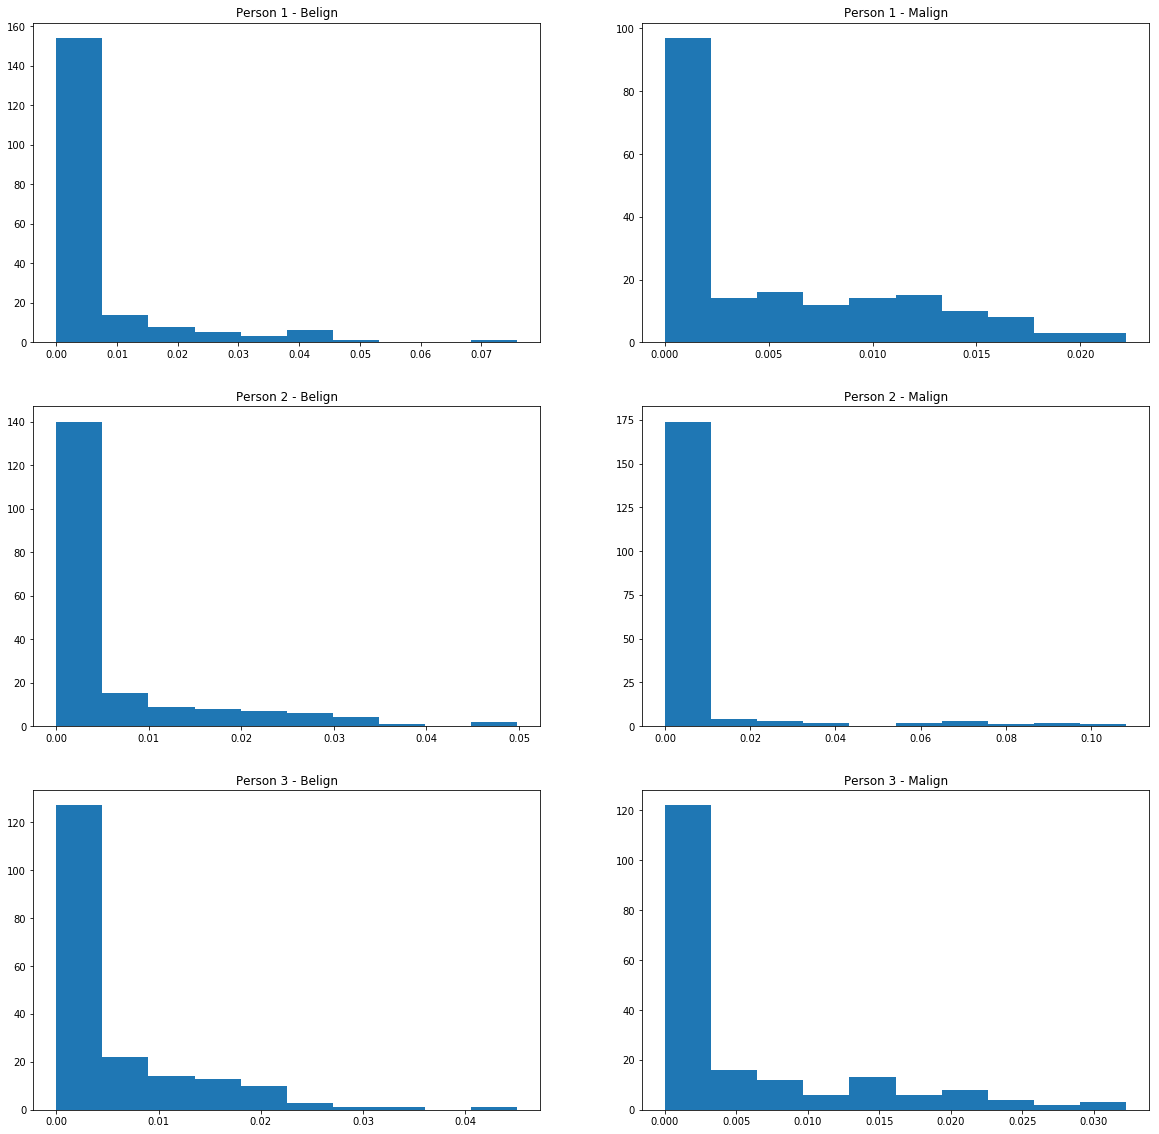

In [8]:
hist_p1_b = global_histogram(img_p1_b, 64)
hist_p1_m = global_histogram(img_p1_m, 64)
hist_p2_b = global_histogram(img_p2_b, 64)
hist_p2_m = global_histogram(img_p2_m, 64)
hist_p3_b = global_histogram(img_p3_b, 64)
hist_p3_m = global_histogram(img_p3_m, 64)

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(hist_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(hist_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(hist_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(hist_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(hist_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(hist_p3_m); plt.title('Person 3 - Malign')
plt.show()



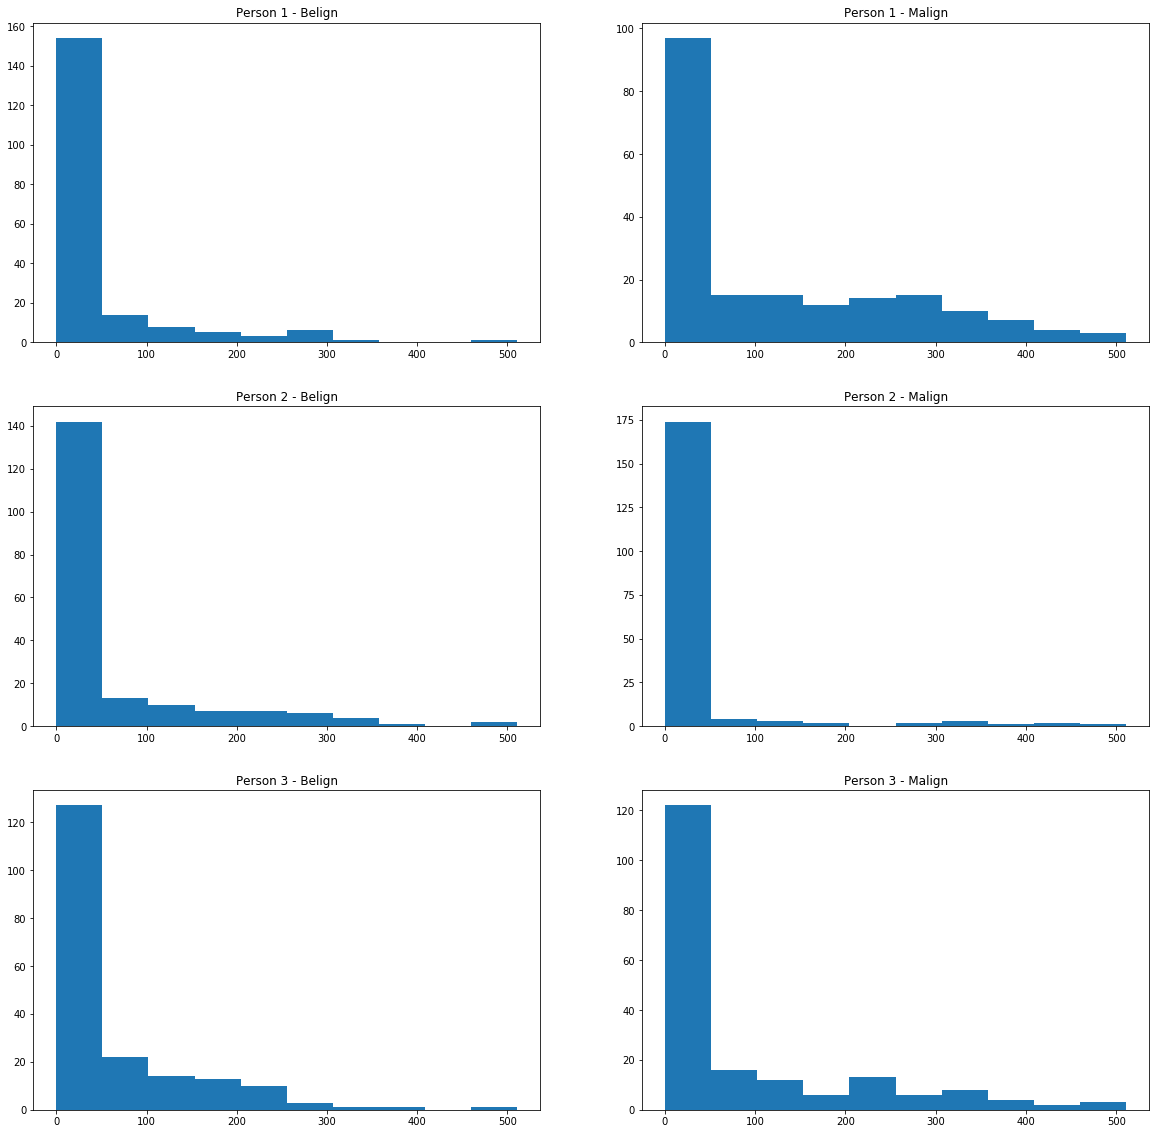

In [9]:
hist_p1_b = global_histogram(img_p1_b, 64, norm='value')
hist_p1_m = global_histogram(img_p1_m, 64, norm='value')
hist_p2_b = global_histogram(img_p2_b, 64, norm='value')
hist_p2_m = global_histogram(img_p2_m, 64, norm='value')
hist_p3_b = global_histogram(img_p3_b, 64, norm='value')
hist_p3_m = global_histogram(img_p3_m, 64, norm='value')

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(hist_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(hist_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(hist_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(hist_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(hist_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(hist_p3_m); plt.title('Person 3 - Malign')
plt.show()

# DISTANCE

In [10]:
def Euclidean_distance(p, q):
    dist = np.sum(np.square(p-q))/float(p.shape[0])
    return dist

In [11]:
print('Same person: Belign x Malign')
print("Distance Person 1 (Belign x Malign) = %.6f" % (Euclidean_distance(hist_p1_b, hist_p1_m)))
print("Distance Person 2 (Belign x Malign) = %.6f" % (Euclidean_distance(hist_p2_b, hist_p2_m)))
print("Distance Person 3 (Belign x Malign) = %.6f" % (Euclidean_distance(hist_p3_b, hist_p3_m)))

Same person: Belign x Malign
Distance Person 1 (Belign x Malign) = 26490.572917
Distance Person 2 (Belign x Malign) = 19749.890625
Distance Person 3 (Belign x Malign) = 18414.697917


In [12]:
print('Different person: Belign')
print("Distance Person 1 x Person 2 (Belign) = %.6f" % (Euclidean_distance(hist_p1_b, hist_p2_b)))
print("Distance Person 1 x Person 3 (Belign) = %.6f" % (Euclidean_distance(hist_p1_b, hist_p3_b)))
print("Distance Person 2 x Person 3 (Belign) = %.6f" % (Euclidean_distance(hist_p2_b, hist_p3_b)))

Different person: Belign
Distance Person 1 x Person 2 (Belign) = 7727.536458
Distance Person 1 x Person 3 (Belign) = 2924.281250
Distance Person 2 x Person 3 (Belign) = 4737.838542


In [13]:
print('Different person: Malign')
print("Distance Person 1 x Person 2 (Malign) = %.6f" % (Euclidean_distance(hist_p1_m, hist_p2_m)))
print("Distance Person 1 x Person 3 (Malign) = %.6f" % (Euclidean_distance(hist_p1_m, hist_p3_m)))
print("Distance Person 2 x Person 3 (Malign) = %.6f" % (Euclidean_distance(hist_p2_m, hist_p3_m)))

Different person: Malign
Distance Person 1 x Person 2 (Malign) = 32311.708333
Distance Person 1 x Person 3 (Malign) = 6351.927083
Distance Person 2 x Person 3 (Malign) = 25295.302083


# DISTANCE - GRAYSCALE

In [14]:
def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)


def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    
    return new_img

def grayscale_histogram(img, bins):
    hist,_ = np.histogram(img, bins=bins, range=(0,255))
    
    # normalizes resulting histogram
    hist = hist.astype(float)
    hist /= (hist.sum() + 0.0001) 
    
    return hist

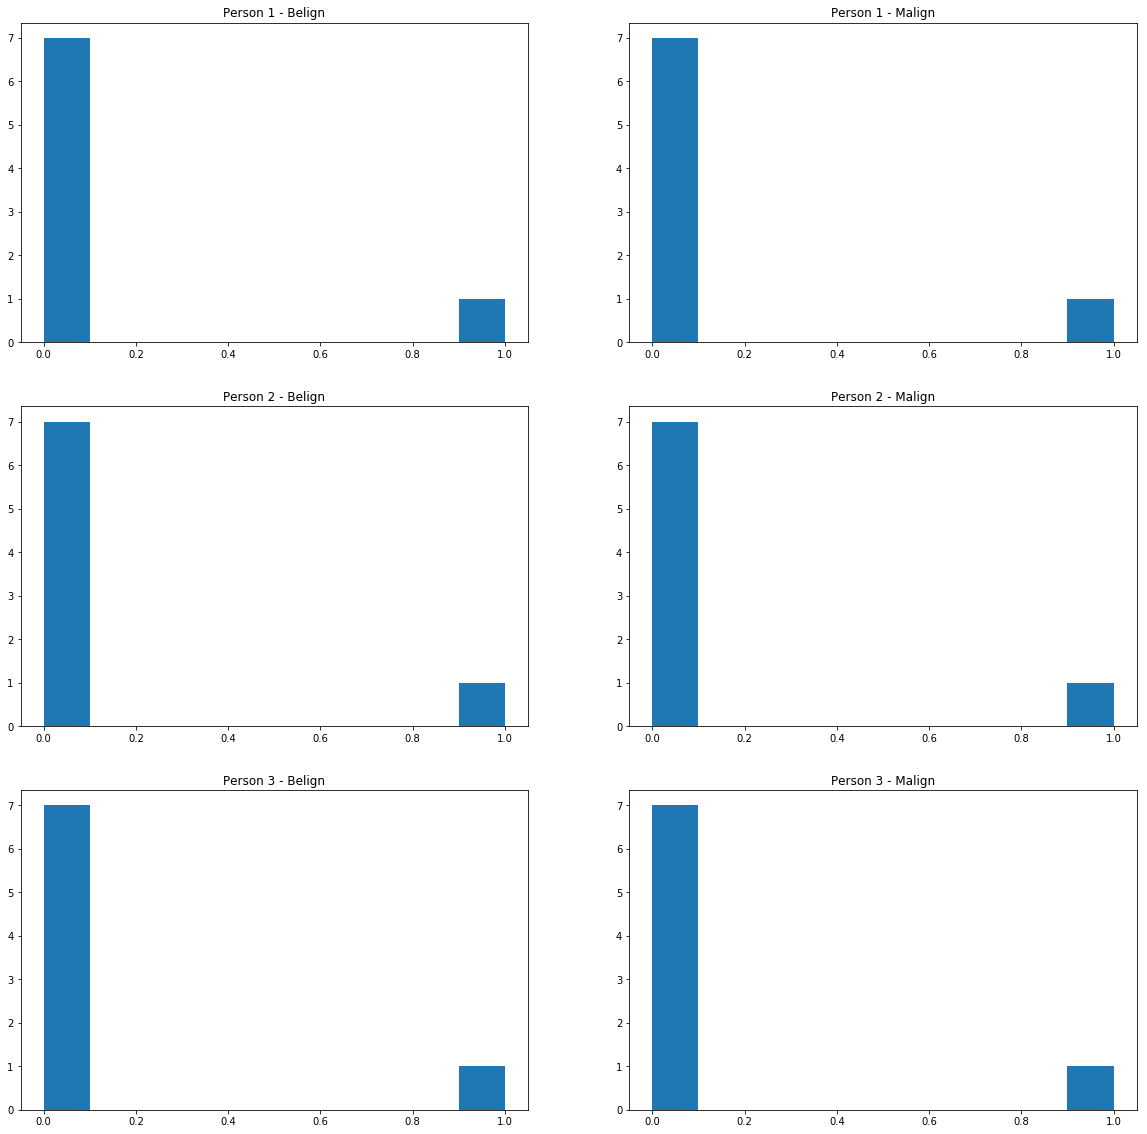

In [15]:
gh_p1_b = grayscale_histogram(img_p1_b, 8)
gh_p1_m = grayscale_histogram(img_p1_m, 8)
gh_p2_b = grayscale_histogram(img_p2_b, 8)
gh_p2_m = grayscale_histogram(img_p2_m, 8)
gh_p3_b = grayscale_histogram(img_p3_b, 8)
gh_p3_m = grayscale_histogram(img_p3_m, 8)

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(gh_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(gh_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(gh_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(gh_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(gh_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(gh_p3_m); plt.title('Person 3 - Malign')
plt.show()


In [16]:
print('Same person: Belign x Malign')
print("Distance Person 1 (Belign x Malign) = %.9f" % (Euclidean_distance(gh_p1_b, gh_p1_m)))
print("Distance Person 2 (Belign x Malign) = %.9f" % (Euclidean_distance(gh_p2_b, gh_p2_m)))
print("Distance Person 3 (Belign x Malign) = %.9f" % (Euclidean_distance(gh_p3_b, gh_p3_m)))

Same person: Belign x Malign
Distance Person 1 (Belign x Malign) = 0.000000000
Distance Person 2 (Belign x Malign) = 0.000000000
Distance Person 3 (Belign x Malign) = 0.000000000


In [17]:
def Log_Euclidean_distance(p, q):
    pl = np.log2(p.astype(float)+1)
    ql = np.log2(q.astype(float)+1)
    
    dist = np.sum(np.square(pl-ql))/float(pl.shape[0])
    return dist

In [18]:
print('Same person: Belign x Malign')
print("Distance Person 1 (Belign x Malign) = %.9f" % (Log_Euclidean_distance(gh_p1_b, gh_p1_m)))
print("Distance Person 2 (Belign x Malign) = %.9f" % (Log_Euclidean_distance(gh_p2_b, gh_p2_m)))
print("Distance Person 3 (Belign x Malign) = %.9f" % (Log_Euclidean_distance(gh_p3_b, gh_p3_m)))

Same person: Belign x Malign
Distance Person 1 (Belign x Malign) = 0.000000000
Distance Person 2 (Belign x Malign) = 0.000000000
Distance Person 3 (Belign x Malign) = 0.000000000


In [19]:
print('Same person: Belign x Malign')
print("Distance Person 1 (Belign x Malign) = %.6f" % (Log_Euclidean_distance(hist_p1_b, hist_p1_m)))
print("Distance Person 2 (Belign x Malign) = %.6f" % (Log_Euclidean_distance(hist_p2_b, hist_p2_m)))
print("Distance Person 3 (Belign x Malign) = %.6f" % (Log_Euclidean_distance(hist_p3_b, hist_p3_m)))

Same person: Belign x Malign
Distance Person 1 (Belign x Malign) = 18.116459
Distance Person 2 (Belign x Malign) = 22.614010
Distance Person 3 (Belign x Malign) = 10.319915


# LOCAL BINARY PATTERNS

In [20]:
from skimage import feature

def lbp_features(img):
    
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img_gray = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), 8, 1, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

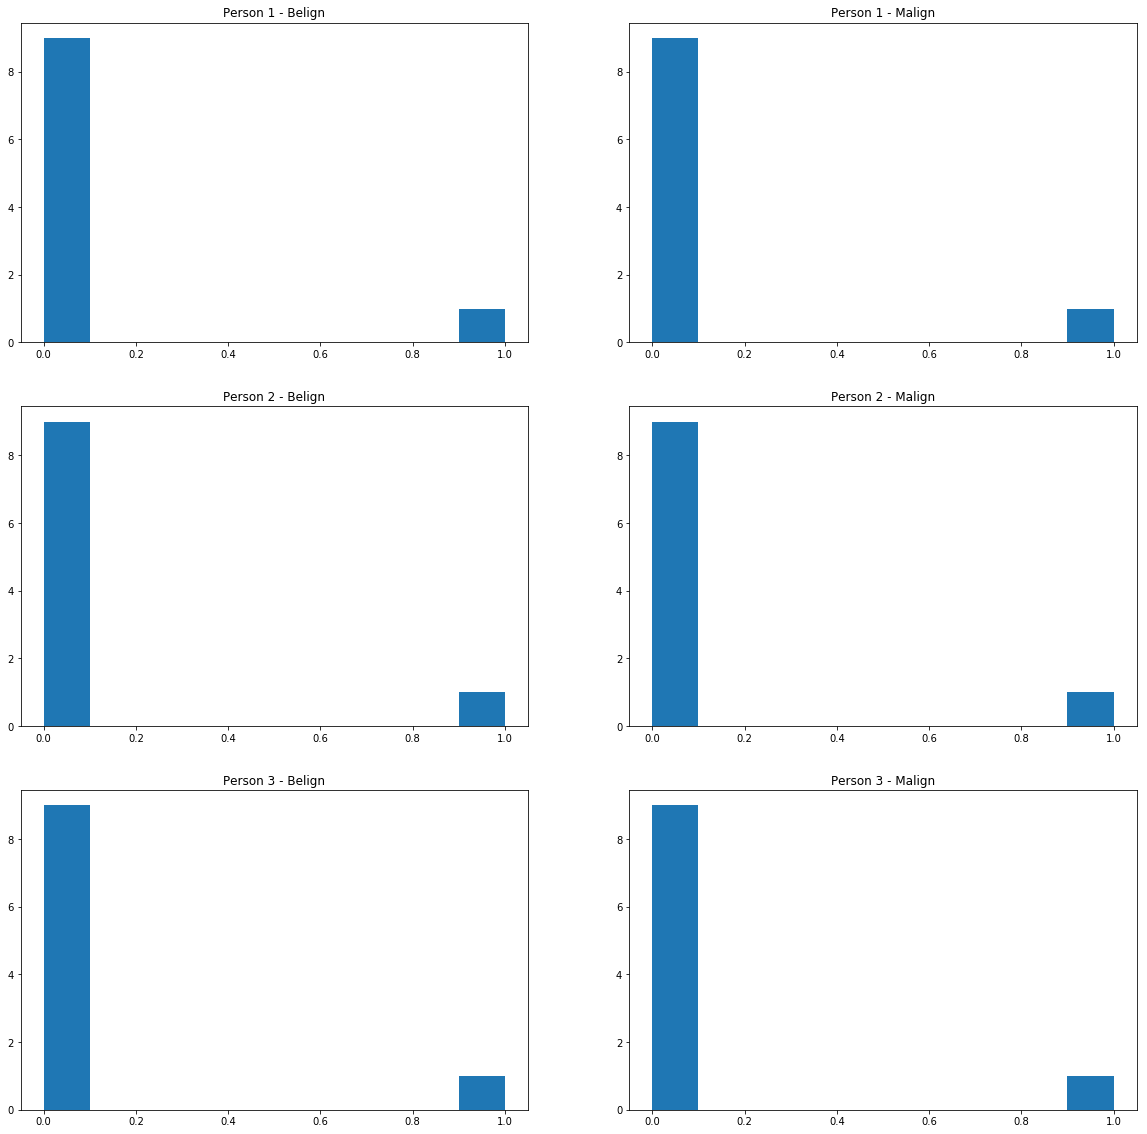

In [21]:
lbp_p1_b = lbp_features(img_p1_b)
lbp_p1_m = lbp_features(img_p1_m)
lbp_p2_b = lbp_features(img_p2_b)
lbp_p2_m = lbp_features(img_p2_m)
lbp_p3_b = lbp_features(img_p3_b)
lbp_p3_m = lbp_features(img_p3_m)

vals = range(len(lbp_p1_b))
plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(lbp_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(lbp_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(lbp_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(lbp_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(lbp_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(lbp_p3_m); plt.title('Person 3 - Malign')
plt.show()



# ALTERNATIVE COLOUR SYSTEMS

Text(0.5,1,'Value')

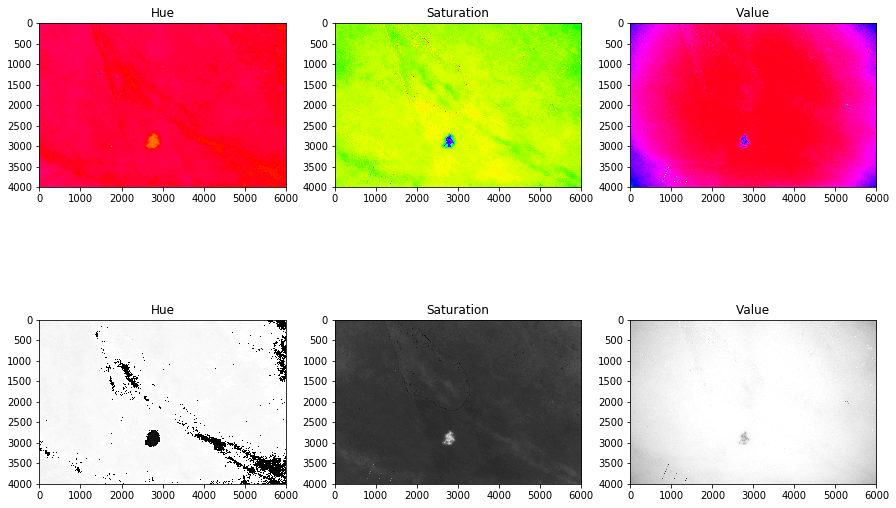

In [73]:
hsv_p1_b = mpl.colors.rgb_to_hsv(img_p1_b)
hsv_p1_m = mpl.colors.rgb_to_hsv(img_p1_m)
hsv_p2_b = mpl.colors.rgb_to_hsv(img_p2_b)
hsv_p2_m = mpl.colors.rgb_to_hsv(img_p2_m)
hsv_p3_b = mpl.colors.rgb_to_hsv(img_p3_b)
hsv_p3_m = mpl.colors.rgb_to_hsv(img_p3_m)


plt.figure(figsize=(15,10))
plt.subplot(231); plt.imshow(hsv_p1_b[:,:,0], cmap="hsv"); plt.title("Hue");
plt.subplot(232); plt.imshow(hsv_p1_b[:,:,1], cmap="hsv"); plt.title("Saturation")
plt.subplot(233); plt.imshow(hsv_p1_b[:,:,2], cmap="hsv"); plt.title("Value")
plt.subplot(234); plt.imshow(hsv_p1_b[:,:,0], cmap="gray"); plt.title("Hue");
plt.subplot(235); plt.imshow(hsv_p1_b[:,:,1], cmap="gray"); plt.title("Saturation")
plt.subplot(236); plt.imshow(hsv_p1_b[:,:,2], cmap="gray"); plt.title("Value")

# GRAYSCALE

In [56]:
from PIL import Image
img_p1_b = np.array(Image.open("images/p1_b.jpg").convert('L'))
img_p1_m = np.array(Image.open("images/p1_m.jpg").convert('L'))
img_p2_b = np.array(Image.open("images/p2_b.jpg").convert('L'))
img_p2_m = np.array(Image.open("images/p2_m.jpg").convert('L'))
img_p3_b = np.array(Image.open("images/p3_b.jpg").convert('L'))
img_p3_m = np.array(Image.open("images/p3_m.jpg").convert('L'))

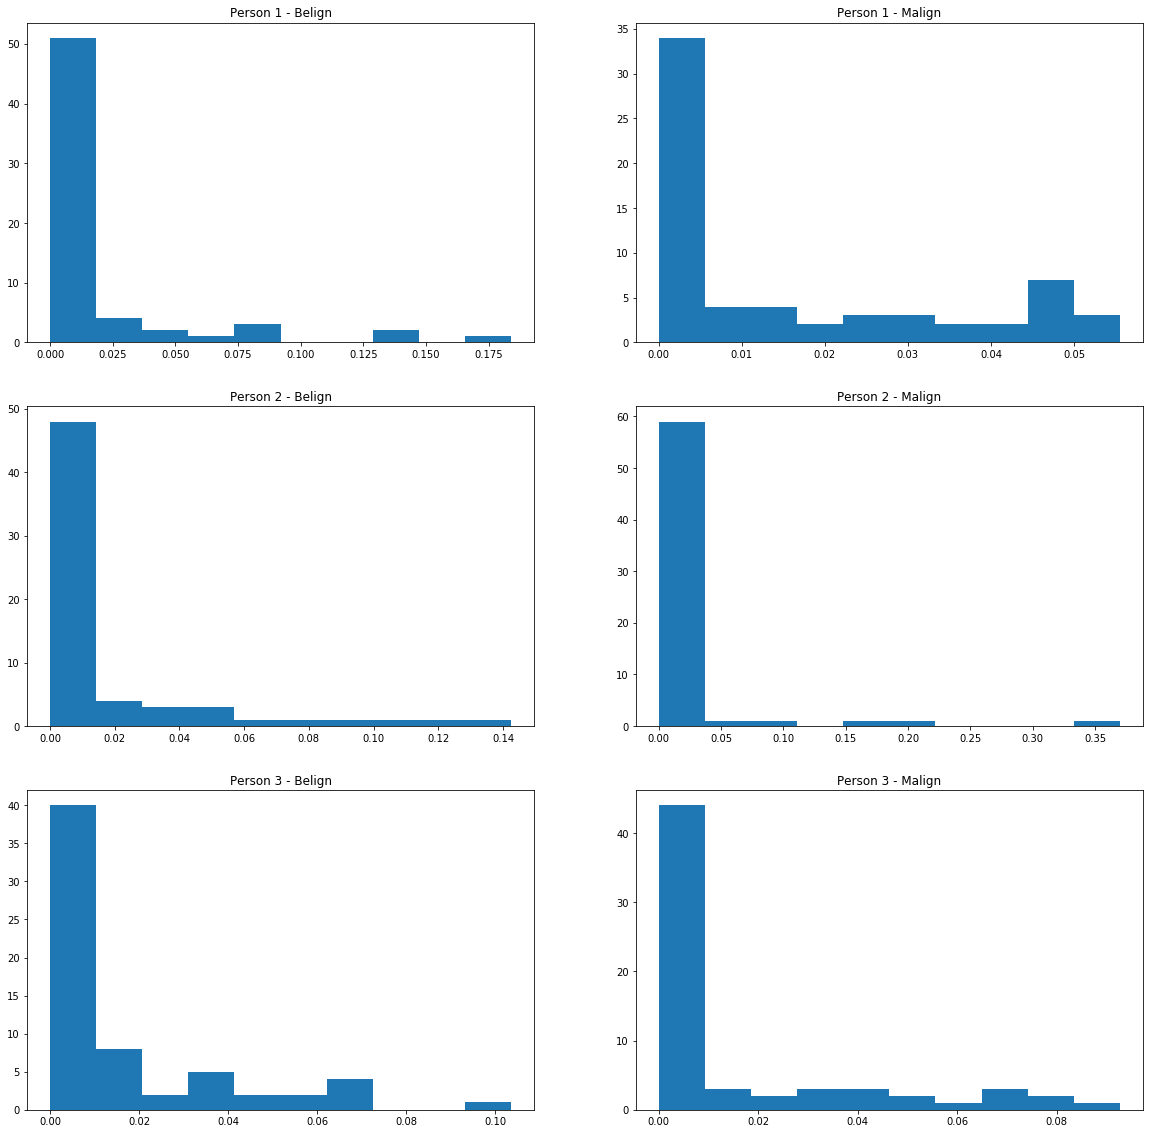

In [57]:
hist_p1_b = global_histogram(img_p1_b, 64)
hist_p1_m = global_histogram(img_p1_m, 64)
hist_p2_b = global_histogram(img_p2_b, 64)
hist_p2_m = global_histogram(img_p2_m, 64)
hist_p3_b = global_histogram(img_p3_b, 64)
hist_p3_m = global_histogram(img_p3_m, 64)

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(hist_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(hist_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(hist_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(hist_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(hist_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(hist_p3_m); plt.title('Person 3 - Malign')
plt.show()



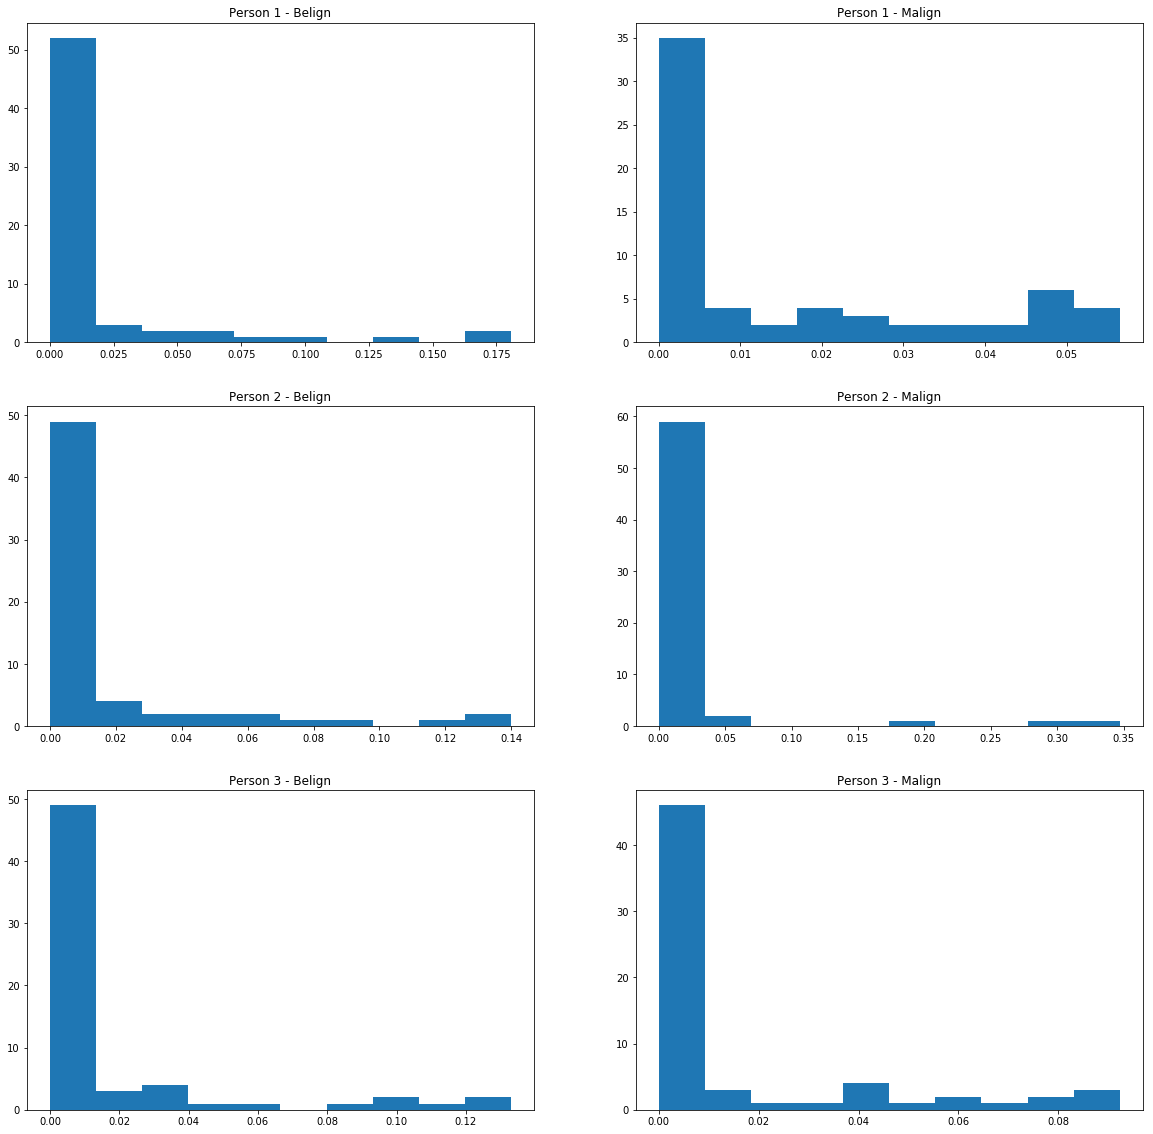

In [58]:
hist_p1_b = grayscale_histogram(img_p1_b, 64)
hist_p1_m = grayscale_histogram(img_p1_m, 64)
hist_p2_b = grayscale_histogram(img_p2_b, 64)
hist_p2_m = grayscale_histogram(img_p2_m, 64)
hist_p3_b = grayscale_histogram(img_p3_b, 64)
hist_p3_m = grayscale_histogram(img_p3_m, 64)

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(hist_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(hist_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(hist_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(hist_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(hist_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(hist_p3_m); plt.title('Person 3 - Malign')
plt.show()

# HSV

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

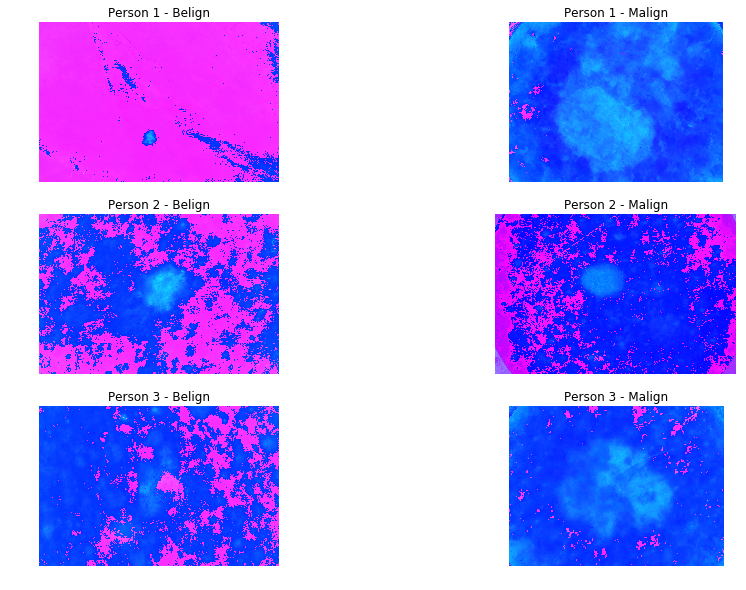

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(321); plt.imshow(hsv_p1_b); plt.axis('off'); plt.title('Person 1 - Belign')
plt.subplot(322); plt.imshow(hsv_p1_m); plt.axis('off'); plt.title('Person 1 - Malign')
plt.subplot(323); plt.imshow(hsv_p2_b); plt.axis('off'); plt.title('Person 2 - Belign')
plt.subplot(324); plt.imshow(hsv_p2_m); plt.axis('off'); plt.title('Person 2 - Malign')
plt.subplot(325); plt.imshow(hsv_p3_b); plt.axis('off'); plt.title('Person 3 - Belign')
plt.subplot(326); plt.imshow(hsv_p3_m); plt.axis('off'); plt.title('Person 3 - Malign')
plt.show

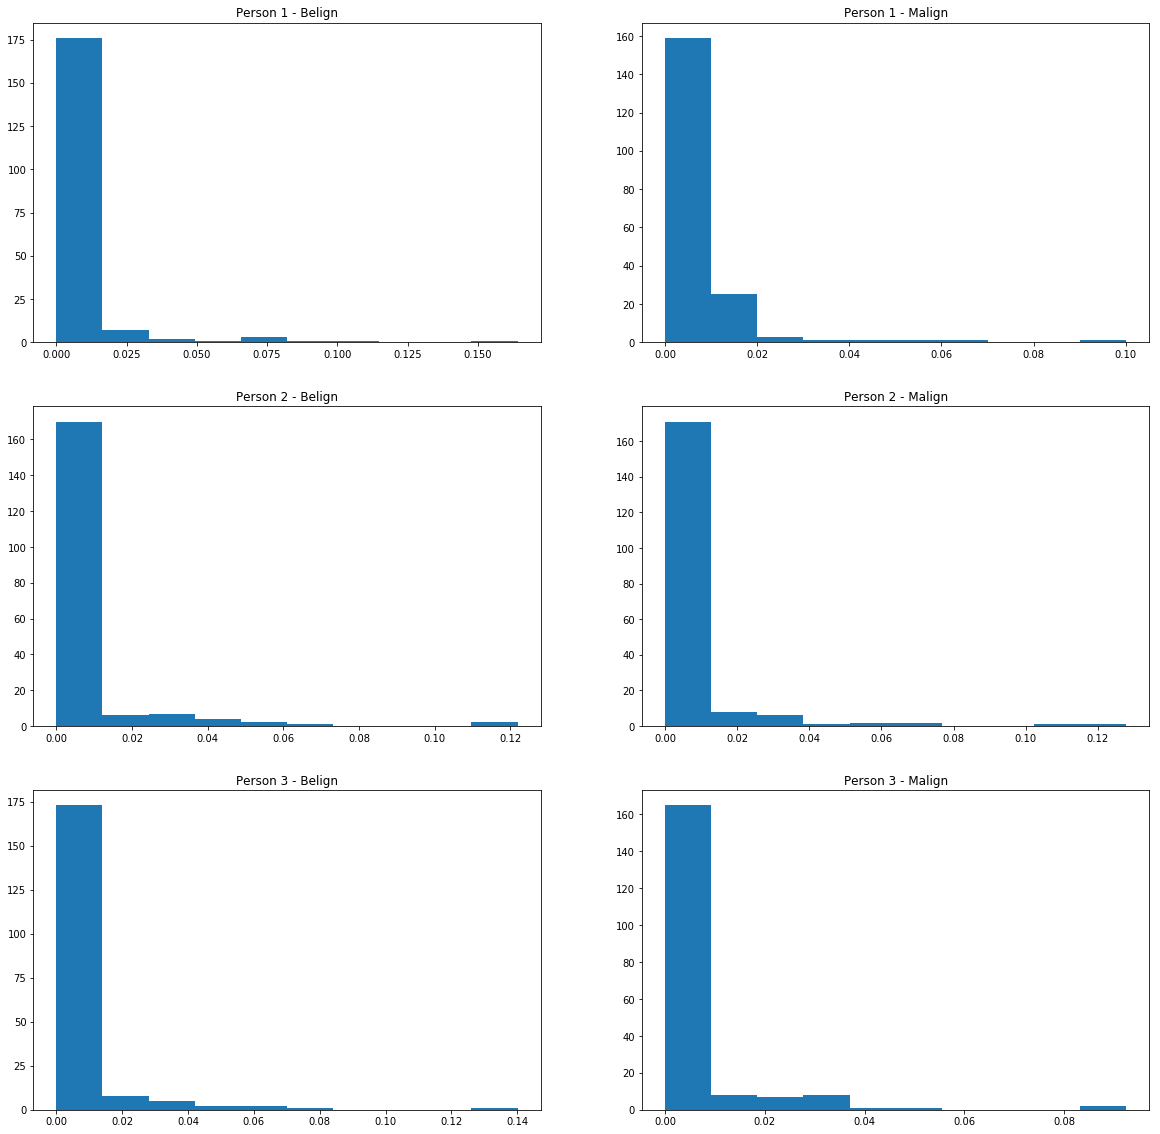

In [77]:
hist_p1_b = global_histogram(hsv_p1_b, 64)
hist_p1_m = global_histogram(hsv_p1_m, 64)
hist_p2_b = global_histogram(hsv_p2_b, 64)
hist_p2_m = global_histogram(hsv_p2_m, 64)
hist_p3_b = global_histogram(hsv_p3_b, 64)
hist_p3_m = global_histogram(hsv_p3_m, 64)

plt.figure(figsize=(20,20))
plt.subplot(321); plt.hist(hist_p1_b); plt.title('Person 1 - Belign')
plt.subplot(322); plt.hist(hist_p1_m); plt.title('Person 1 - Malign')
plt.subplot(323); plt.hist(hist_p2_b); plt.title('Person 2 - Belign')
plt.subplot(324); plt.hist(hist_p2_m); plt.title('Person 2 - Malign')
plt.subplot(325); plt.hist(hist_p3_b); plt.title('Person 3 - Belign')
plt.subplot(326); plt.hist(hist_p3_m); plt.title('Person 3 - Malign')
plt.show()